In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

In [3]:
#normalise
std=np.std(X,axis=0,keepdims=True)
Mean = np.mean(X, axis=0, keepdims=True)
Norm_X = (X - Mean) / (std+1e-7)

In [4]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

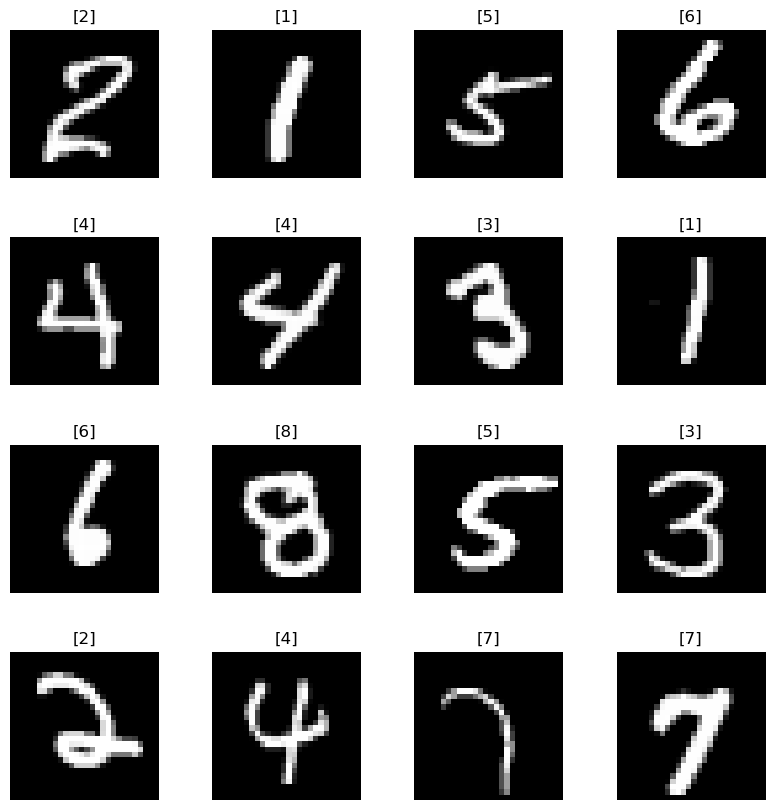

In [5]:
# display a 4x4 grid
import matplotlib.pyplot as plt
import random
indices = random.sample(range(X_train.shape[0]), 16)
sample_images = X_train[indices]
sample_labels = y_train[indices]
sample_images = sample_images.reshape(-1, 28, 28)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(sample_images[i], cmap='gray')
    axes[i].set_title(str(sample_labels[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
plt.show()


In [6]:
def relu(z):
    relu_z = np.maximum(0, z)
    return relu_z


In [7]:
def softmax(z):
    z_max = np.max(z, axis=1, keepdims=True)
    z_stable = z - z_max
    exp_z = np.exp(z_stable)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [8]:
def init_params(input_size, hidden_size, output_size):
    np.random.seed(2) # for reproducibility
    W1 = np.random.randn(input_size, hidden_size)*0.01
    b1 = np.zeros((hidden_size,1))*0.01
    W2 = np.random.randn(hidden_size, output_size)*0.01
    b2 = np.zeros((output_size,1))*0.01
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters


In [9]:
def forward_prop(X, weights):
    """
    X: input data
    weights: weights of the layers
    returns: logits, output of each layer z1,a1,z2,a2
    """
    W1, b1, W2, b2 = weights["W1"], weights["b1"], weights["W2"], weights["b2"]
    z1 = np.dot(X, W1) + np.transpose(b1)
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + np.transpose(b2)
    a2 = softmax(z2)
    return (z1, a1, z2, a2)


In [10]:
def backward_propg(weights, X, y, outputs, lr):
    (z1,a1,z2,a2)=outputs
    (W1,b1,W2,b2)=weights["W1"], weights["b1"], weights["W2"], weights["b2"]
    
    N=X.shape[0]
    grad_output2=softmax(z2)/N
    for i in range(N):
        grad_output2[i][y[i]]-=1/N
    grad_b2=np.sum(grad_output2,axis=0,keepdims=True).T
    grad_W2=a1.T@grad_output2
    grad_output1=grad_output2@W2.T
    grad_relu=grad_output1*(a1>0)
    grad_b1=np.sum(grad_relu,axis=0,keepdims=True).T
    grad_W1=X.T@grad_relu
    
    # update weights
    W1 = W1 - lr * grad_W1
    b1 = b1 - lr * grad_b1
    W2 = W2 - lr * grad_W2
    b2 = b2 - lr * grad_b2

    
    weights = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return weights


In [11]:
def cost_func(weights, y, X):
    (z1,a1,z2,a2)=forward_prop(X, weights)
    prob = softmax(a2)
    N = X.shape[0]
    cost=0
    for j in range (N):
        cost += -np.log(max(a2[j][y[j]], 1e-12))
    cost/=N
    return cost


In [23]:
def train(X, y, hidden_nodes, epochs=1000, lr=1e-3):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    weights = init_params(input_size=X.shape[1], hidden_size=hidden_nodes, output_size=10)
    
    for i in range(epochs):
        # forward propagation
        outputs = forward_prop(X, weights)
        
        # print cost at every 100 or so iterations
        if i % 1 == 0:
            cost = cost_func(weights, y, X)
            print("Cost at iteration", i, ":", cost)
        
        # backward propagation
        weights = backward_propg(weights, X, y, outputs, lr)
        
       
    return weights


In [13]:
def predict(X_test, updated_weights):
    """
    returns the prediction in [0,9] for each element in X
    """
    # forward propogation
    updated_weights= forward_prop(X_test, updated_weights)
    
    # unpack weights
    z1, a1, z2, a2 = updated_weights
    
    # return predictions
    predictions = np.argmax(z2, axis=1)
    return predictions


In [14]:
def accuracy(predictions, y_test):
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            correct += 1
    return correct / len(predictions) * 100


In [22]:
print(accuracy(predict(X_test,train(X_train,y_train,121,1000,1e-3)),y_test))

Cost at iteration 0 : [3.07265123]
Cost at iteration 1 : [2.37808832]
Cost at iteration 2 : [1.9521189]
Cost at iteration 3 : [1.70996277]
Cost at iteration 4 : [1.50803097]
Cost at iteration 5 : [1.36087727]
Cost at iteration 6 : [1.2226688]
Cost at iteration 7 : [1.13203676]
Cost at iteration 8 : [1.043237]
Cost at iteration 9 : [0.98178489]
Cost at iteration 10 : [0.92244671]
Cost at iteration 11 : [0.87877078]
Cost at iteration 12 : [0.83632228]
Cost at iteration 13 : [0.80316258]
Cost at iteration 14 : [0.77126205]
Cost at iteration 15 : [0.74491262]
Cost at iteration 16 : [0.71999845]
Cost at iteration 17 : [0.69846383]
Cost at iteration 18 : [0.67839569]
Cost at iteration 19 : [0.66050638]
Cost at iteration 20 : [0.64394661]
Cost at iteration 21 : [0.62888454]
Cost at iteration 22 : [0.61493469]
Cost at iteration 23 : [0.60207652]
Cost at iteration 24 : [0.59013196]
Cost at iteration 25 : [0.57902632]
Cost at iteration 26 : [0.56865986]
Cost at iteration 27 : [0.55896223]
Cost a

Cost at iteration 226 : [0.25480088]
Cost at iteration 227 : [0.25438613]
Cost at iteration 228 : [0.25397382]
Cost at iteration 229 : [0.25356305]
Cost at iteration 230 : [0.25315434]
Cost at iteration 231 : [0.25274739]
Cost at iteration 232 : [0.25234264]
Cost at iteration 233 : [0.25193964]
Cost at iteration 234 : [0.2515383]
Cost at iteration 235 : [0.2511386]
Cost at iteration 236 : [0.25074077]
Cost at iteration 237 : [0.25034484]
Cost at iteration 238 : [0.24995059]
Cost at iteration 239 : [0.24955812]
Cost at iteration 240 : [0.24916752]
Cost at iteration 241 : [0.24877896]
Cost at iteration 242 : [0.24839207]
Cost at iteration 243 : [0.2480068]
Cost at iteration 244 : [0.2476234]
Cost at iteration 245 : [0.24724156]
Cost at iteration 246 : [0.24686123]
Cost at iteration 247 : [0.24648258]
Cost at iteration 248 : [0.24610557]
Cost at iteration 249 : [0.24573026]
Cost at iteration 250 : [0.24535662]
Cost at iteration 251 : [0.24498451]
Cost at iteration 252 : [0.24461367]
Cost 

Cost at iteration 449 : [0.1913735]
Cost at iteration 450 : [0.19117173]
Cost at iteration 451 : [0.19097046]
Cost at iteration 452 : [0.19076967]
Cost at iteration 453 : [0.19056949]
Cost at iteration 454 : [0.19036995]
Cost at iteration 455 : [0.19017099]
Cost at iteration 456 : [0.18997252]
Cost at iteration 457 : [0.18977451]
Cost at iteration 458 : [0.18957695]
Cost at iteration 459 : [0.18937977]
Cost at iteration 460 : [0.18918314]
Cost at iteration 461 : [0.18898705]
Cost at iteration 462 : [0.18879149]
Cost at iteration 463 : [0.18859635]
Cost at iteration 464 : [0.18840155]
Cost at iteration 465 : [0.18820709]
Cost at iteration 466 : [0.18801291]
Cost at iteration 467 : [0.18781912]
Cost at iteration 468 : [0.18762574]
Cost at iteration 469 : [0.18743291]
Cost at iteration 470 : [0.18724063]
Cost at iteration 471 : [0.18704888]
Cost at iteration 472 : [0.18685757]
Cost at iteration 473 : [0.1866667]
Cost at iteration 474 : [0.18647628]
Cost at iteration 475 : [0.18628619]
Cos

Cost at iteration 671 : [0.15560264]
Cost at iteration 672 : [0.15547225]
Cost at iteration 673 : [0.15534211]
Cost at iteration 674 : [0.15521218]
Cost at iteration 675 : [0.15508241]
Cost at iteration 676 : [0.15495291]
Cost at iteration 677 : [0.15482363]
Cost at iteration 678 : [0.15469461]
Cost at iteration 679 : [0.1545658]
Cost at iteration 680 : [0.15443708]
Cost at iteration 681 : [0.15430845]
Cost at iteration 682 : [0.15417998]
Cost at iteration 683 : [0.15405169]
Cost at iteration 684 : [0.1539236]
Cost at iteration 685 : [0.1537957]
Cost at iteration 686 : [0.15366804]
Cost at iteration 687 : [0.1535406]
Cost at iteration 688 : [0.15341341]
Cost at iteration 689 : [0.15328642]
Cost at iteration 690 : [0.15315951]
Cost at iteration 691 : [0.15303281]
Cost at iteration 692 : [0.1529063]
Cost at iteration 693 : [0.15277999]
Cost at iteration 694 : [0.1526539]
Cost at iteration 695 : [0.15252807]
Cost at iteration 696 : [0.15240247]
Cost at iteration 697 : [0.15227706]
Cost at

Cost at iteration 894 : [0.13080101]
Cost at iteration 895 : [0.13070597]
Cost at iteration 896 : [0.13061102]
Cost at iteration 897 : [0.13051618]
Cost at iteration 898 : [0.13042145]
Cost at iteration 899 : [0.13032689]
Cost at iteration 900 : [0.13023246]
Cost at iteration 901 : [0.13013812]
Cost at iteration 902 : [0.1300439]
Cost at iteration 903 : [0.12994976]
Cost at iteration 904 : [0.12985577]
Cost at iteration 905 : [0.12976186]
Cost at iteration 906 : [0.12966805]
Cost at iteration 907 : [0.12957436]
Cost at iteration 908 : [0.12948075]
Cost at iteration 909 : [0.12938732]
Cost at iteration 910 : [0.12929399]
Cost at iteration 911 : [0.12920079]
Cost at iteration 912 : [0.12910769]
Cost at iteration 913 : [0.12901469]
Cost at iteration 914 : [0.12892178]
Cost at iteration 915 : [0.12882903]
Cost at iteration 916 : [0.1287364]
Cost at iteration 917 : [0.12864391]
Cost at iteration 918 : [0.12855153]
Cost at iteration 919 : [0.1284593]
Cost at iteration 920 : [0.12836716]
Cost

In [16]:
import pickle
import random

roll_num = "22B1069" # enter ldap
hidden_dim = 121 # replace with your own hidden dimension

# initialize weights
layer_0_wt = np.random.randn(784, hidden_dim)
layer_0_bias = np.random.randn(hidden_dim, 1)
layer_1_wt = np.random.randn(hidden_dim, 10)
layer_1_bias = np.random.randn(10, 1)


model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': (784,256), # layer 0 weight (784, z)
    'layer_0_bias': (256,1), # layer 0 bias (z, 1)
    'layer_1_wt': (256,10), # layer 1 weight (z, 10)
    'layer_1_bias': (10,1) # layer 1 bias (10, 1)
}

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)